In [1]:
!pip install pymongo

In [1]:
import pandas as pd
import numpy as np
from pymongo import MongoClient
import matplotlib.pyplot as mpt
%matplotlib inline

In [2]:
client = MongoClient()
db = client.admin

In [3]:
# print number of rows in each collection
for c in db.collection_names():
    print('{:10}'.format(c), '{:>10,}'.format(db[c].count()))

review      6,685,900
business      192,609
system.version          1


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
# connecting collections
reviews_collection = db.review
business_collection = db.business

In [5]:
one_review = reviews_collection.find_one()
one_business = business_collection.find_one()
#print(one_review)

In [6]:
bus_df = pd.DataFrame(list(business_collection.find()))
#bus_df.columns

# Getting top five states with most businesses 

In [7]:
#bus_df.state.value_counts()
freq_bus_df = bus_df.state.value_counts().rename_axis('State').reset_index(name='Bussinesses')
#print (freq_bus_df)
top_states = pd.DataFrame(freq_bus_df.head(5))
top_states

,State,Bussinesses
0,AZ,56686
1,NV,36312
2,ON,33412
3,NC,14720
4,OH,14697


# Visualizing where Ontario stands among other Provinces using matplotlib

In [8]:
colors = ["#1F75FE", "#58508D", "#BC5090", "#FF6361", "#FFA600", "#EB8076", "#96624E"]

## Pie chart showing percentage of Ontario restaurants in our data

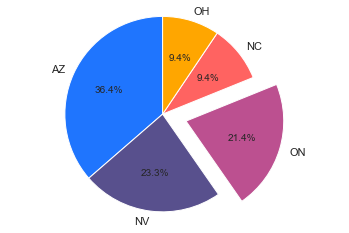

<Figure size 864x576 with 0 Axes>

In [45]:
mpt.pie(top_states['Bussinesses'],labels=top_states['State'],colors=colors,explode=(0, 0, 0.25, 0, 0),startangle=90,autopct='%1.1f%%',)
mpt.axis('equal')
mpt.figure(figsize=(12,8))
mpt.show()

In [17]:
%%time
on_df = bus_df.loc[bus_df['state'] == 'ON']
#on_df
mod_on_df = on_df.loc[on_df['review_count'] > 300]

Wall time: 99.7 ms


In [18]:
mod_on_df = mod_on_df.drop( ['_id','latitude','longitude','is_open','hours'],axis = 1)
#mod_on_df


,business_id,name,address,city,state,postal_code,stars,review_count,attributes,categories
156,c35qzLN6ItDpVIoj2uQW4Q,Ravi Soups,322 Adelaide Street W,Toronto,ON,M5V 1R1,4.5,332,"{'Alcohol': 'u'beer_and_wine'', 'BikeParking':...","Soup, Restaurants, Sandwiches"
1136,uF86ZhygpBEGr3CudNemYA,O.Noir,620 Church St,Toronto,ON,M4Y 2G2,3.5,301,"{'GoodForMeal': '{'dessert': False, 'latenight...","Canadian (New), American (New), Restaurants"
2037,XYIPXJ9parr9FtvvcGI1SA,GB Hand-pulled Noodles,66 Edward Street,Toronto,ON,M5G 1C9,4.0,421,"{'RestaurantsDelivery': 'False', 'HasTV': 'Fal...","Chinese, Restaurants, Noodles"
2265,WKOUTdVJS58E178JjhwidQ,Pastel Creperies & Dessert House,5417 Yonge Street,North York,ON,M2N 5R6,4.0,316,"{'RestaurantsDelivery': 'False', 'GoodForMeal'...","Food, Restaurants, Coffee & Tea, Creperies, De..."
4276,O-uIEuv7JLUHajkemx_sVw,Beerbistro,18 King Street E,Toronto,ON,M5C 1C4,4.0,596,"{'RestaurantsReservations': 'True', 'Restauran...","Restaurants, Bistros, Bars, Beer Bar, Pubs, Ni..."
...,...,...,...,...,...,...,...,...,...,...
185919,fh8a_k9oslEDSHbmJLzUrQ,Kekou Gelato,394 Queen Street W,Toronto,ON,M5V 2A6,4.5,345,"{'RestaurantsTakeOut': 'True', 'Caters': 'Fals...","Desserts, Ice Cream & Frozen Yogurt, Food"
186797,O66Zy8Y13VBm72ZDhS4fIg,Sassafraz,100 Cumberland Street,Toronto,ON,M5R 1A6,3.5,325,"{'BikeParking': 'True', 'RestaurantsPriceRange...","American (New), Restaurants, Event Planning & ..."
187628,XCxxPZ3Lu5mwmIo7IQRf1g,Osaka Sushi Japanese Korean Restaurant,5762 Highway 7 E,Markham,ON,L3P 1A8,4.0,323,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Korean, Sushi Bars, Restaurants, Japanese"
188178,5aeOewSy4RiI8sLLWpeNGA,Pablo Cheesetart Canada,114 Dundas St W,Toronto,ON,M5G 1C3,3.0,308,"{'RestaurantsPriceRange2': '2', 'RestaurantsDe...","Desserts, Food, Restaurants, Cafes"


# Selecting only Restaurants from above dataframe

In [19]:
def check_if_rest(bus,lis):
    if bus in lis:
        return True
    else:
        return False
only_rest = mod_on_df[mod_on_df.categories.map(lambda x: check_if_rest('Restaurants',x))]
only_rest.to_csv('Ontario_resto.csv')
#only_rest

,business_id,name,address,city,state,postal_code,stars,review_count,attributes,categories
156,c35qzLN6ItDpVIoj2uQW4Q,Ravi Soups,322 Adelaide Street W,Toronto,ON,M5V 1R1,4.5,332,"{'Alcohol': 'u'beer_and_wine'', 'BikeParking':...","Soup, Restaurants, Sandwiches"
1136,uF86ZhygpBEGr3CudNemYA,O.Noir,620 Church St,Toronto,ON,M4Y 2G2,3.5,301,"{'GoodForMeal': '{'dessert': False, 'latenight...","Canadian (New), American (New), Restaurants"
2037,XYIPXJ9parr9FtvvcGI1SA,GB Hand-pulled Noodles,66 Edward Street,Toronto,ON,M5G 1C9,4.0,421,"{'RestaurantsDelivery': 'False', 'HasTV': 'Fal...","Chinese, Restaurants, Noodles"
2265,WKOUTdVJS58E178JjhwidQ,Pastel Creperies & Dessert House,5417 Yonge Street,North York,ON,M2N 5R6,4.0,316,"{'RestaurantsDelivery': 'False', 'GoodForMeal'...","Food, Restaurants, Coffee & Tea, Creperies, De..."
4276,O-uIEuv7JLUHajkemx_sVw,Beerbistro,18 King Street E,Toronto,ON,M5C 1C4,4.0,596,"{'RestaurantsReservations': 'True', 'Restauran...","Restaurants, Bistros, Bars, Beer Bar, Pubs, Ni..."
...,...,...,...,...,...,...,...,...,...,...
185011,A7waf6G3cvnLfAqKeLL8DA,Buca,604 King Street W,Toronto,ON,M5V 1M6,4.0,392,"{'RestaurantsAttire': 'u'dressy'', 'Caters': '...","Restaurants, Italian"
186797,O66Zy8Y13VBm72ZDhS4fIg,Sassafraz,100 Cumberland Street,Toronto,ON,M5R 1A6,3.5,325,"{'BikeParking': 'True', 'RestaurantsPriceRange...","American (New), Restaurants, Event Planning & ..."
187628,XCxxPZ3Lu5mwmIo7IQRf1g,Osaka Sushi Japanese Korean Restaurant,5762 Highway 7 E,Markham,ON,L3P 1A8,4.0,323,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Korean, Sushi Bars, Restaurants, Japanese"
188178,5aeOewSy4RiI8sLLWpeNGA,Pablo Cheesetart Canada,114 Dundas St W,Toronto,ON,M5G 1C3,3.0,308,"{'RestaurantsPriceRange2': '2', 'RestaurantsDe...","Desserts, Food, Restaurants, Cafes"


# Now, processing reviews

## There are 6.6 million records which requires more hardware resources, so dividing in parts of 1.5 million and processing them

In [20]:
rev_df = pd.DataFrame(list(reviews_collection.find({}).limit(1500000)))

In [22]:
#rev_df

In [23]:
ont_reviews = rev_df[rev_df.business_id.isin(only_rest.business_id.values)]
#ont_reviews

,_id,review_id,user_id,business_id,stars,useful,funny,cool,text,date
192,5e72e2404b76cbf27780c5dc,JQqkuljXAr169_5Pqe-xLA,eZeBuiVZWT7u3SktO7mv9w,WKOUTdVJS58E178JjhwidQ,4.0,1,0,1,I love coming to pastel ! My favorite items ar...,2017-06-06 19:35:30
206,5e72e2404b76cbf27780c5ea,14nlCLR8QE_Xj8-ND88Pjg,A8JQMM-1RSbezLNzxCkW1w,uF86ZhygpBEGr3CudNemYA,3.0,0,0,0,This was a fun experience.. although sitting i...,2015-12-20 20:16:16
286,5e72e2404b76cbf27780c63a,UPQ79Rqc27mKXYGAMRZ6qg,NqY4ku6Zqdalaozxk0NQ8w,w1clLiXOo-yLhNjt5jDBCA,3.0,2,1,1,Their is a bit of a disconnect from the moment...,2014-11-30 00:36:29
349,5e72e2404b76cbf27780c679,Lm1CbxXSIpXJ9TYPQt6-zg,XDYnGRhaCQteZNFPZonRow,_u1Bq7QsgMUXSMex8QHqLQ,4.0,0,1,0,"So I once went to see Brent Spiner, the guy wh...",2008-12-03 23:39:14
400,5e72e2404b76cbf27780c6ac,U65vzUeTjOJC_MXWBRLIig,oAINPedtuyRWpeY7Ey-9Bg,c35qzLN6ItDpVIoj2uQW4Q,4.0,0,0,0,"Very simple, yet very tasty wraps. Corn chow...",2016-07-03 18:02:14
...,...,...,...,...,...,...,...,...,...,...
1499679,5e72e2964b76cbf27797ad1e,3D3zSIIDhe4nsghMKLLKQw,aUlnMALjy4sXJP1KxjuX1g,Yl2TN9c23ZGLUBSD9ks5Uw,4.0,1,0,0,I was very excited to try this place after all...,2017-09-23 03:34:54
1499727,5e72e2964b76cbf27797ad4e,etzrQqhSJsSbNB58E1Sk3g,p5x8SXQ66MIOkenduz_2Zg,piZ4JqJI5WTljJuQV7yZHQ,2.0,0,0,0,of all the ramen places springing up in downto...,2013-11-19 02:31:19
1499807,5e72e2964b76cbf27797ad9e,5rt9Pr7JZAh4jso2vilNHg,AryBBn--MdbJylcIAVb-_A,C8_zdU7zGLUK3uC4e5AepQ,3.0,1,0,0,3.5 stars for this restaurant that has consist...,2017-10-07 04:52:55
1499878,5e72e2964b76cbf27797ade5,jm3lFBrQ_SG-qNLTD5qm3g,fhvxvHvCfnFWs7HLC9PAUw,IRd0jvnfJ3tV6AMlYMajzw,4.0,0,0,0,"Long ago, before they renovated years ago, I u...",2014-01-04 05:05:36


In [24]:
rev_df = pd.DataFrame(list(reviews_collection.find({}).skip(1500000).limit(1500000)))

In [25]:
ont_reviews_2 = rev_df[rev_df.business_id.isin(only_rest.business_id.values)]
#ont_reviews_2

,_id,review_id,user_id,business_id,stars,useful,funny,cool,text,date
17,5e72e2964b76cbf27797ae71,_pACCOXwNEp7IQDkpGGV-Q,IY5c_Lb3xz150VMVDlL9sA,9tfw-OEfpF0qC2hSzRks6g,2.0,1,1,0,We had terrible service here. I think our wait...,2012-06-04 17:21:40
19,5e72e2964b76cbf27797ae73,BEg57pPdlutjdVqOklEQGg,gYR7WF-M8k-zc2UBS1Uyzw,htQgj-ANQpZGpIpkkrEmyQ,4.0,2,1,0,Came here on a Saturday afternoon at 1pm. The ...,2015-12-08 04:17:20
93,5e72e2964b76cbf27797aebd,mQJGKWEwPb5YsG73v3grjg,tSazQPhtHRtGdnViNN4AOg,B70iTJjcPkuYn8ouUewWgw,2.0,0,0,0,"Food was bland, not at all interesting. The tr...",2017-09-12 01:11:31
285,5e72e2964b76cbf27797af7d,pY-w0BY0lQiLamMwXupWAg,ic-tyi1jElL_umxZVh8KNA,wSojc-y-d7MWiGWdy8deCg,3.0,0,0,0,"wait and lines are major turn off, try it duri...",2014-05-30 17:41:18
294,5e72e2964b76cbf27797af86,KWNwwlmTmtdWf4AN2r8OkQ,z66KKknqWzFBWZb0GbEi2g,fGurvC5BdOfd5MIuLUQYVA,3.0,0,1,1,I'd order the steamed dumplings here again. Bu...,2017-02-23 03:03:17
...,...,...,...,...,...,...,...,...,...,...
1499327,5e72e2e44b76cbf277ae9502,GrQOBp2wd7aNKwP9FqLYew,sWKaLjpYG6VABf23CXDhyA,oWTn2IzrprsRkPfULtjZtQ,4.0,0,0,1,Had no intention of coming here but while driv...,2015-06-01 22:55:44
1499350,5e72e2e44b76cbf277ae9519,FpqG_qqrhgMFANaQ5MT2nA,32gt7yzMaFzZNoPHlnbp4w,6EVBc9kdc3Hd8KZkLVPnGA,5.0,1,0,0,I never write reviews but this place is a must...,2017-02-18 03:08:56
1499371,5e72e2e44b76cbf277ae952e,Avm7krEOODm-whTqBkNPvg,QZzYd0ax8CvKHU1RGQCnUw,BYDs_o6U4CLxJec8k1Q90Q,3.0,2,1,1,Small takeout style place that serves one thin...,2016-11-19 15:21:26
1499471,5e72e2e44b76cbf277ae9592,bva-o_JgwICwDW2C-kZZFg,O-sjif0BRtfUYp-2Q-pk5Q,snw9iNNLpFYZeHotW00uVA,3.0,0,0,0,Good and interesting food but overpriced and s...,2015-08-12 23:45:29


In [27]:
ont_reviews = ont_reviews.append(ont_reviews_2, ignore_index = True)
#ont_reviews

,_id,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,5e72e2404b76cbf27780c5dc,JQqkuljXAr169_5Pqe-xLA,eZeBuiVZWT7u3SktO7mv9w,WKOUTdVJS58E178JjhwidQ,4.0,1,0,1,I love coming to pastel ! My favorite items ar...,2017-06-06 19:35:30
1,5e72e2404b76cbf27780c5ea,14nlCLR8QE_Xj8-ND88Pjg,A8JQMM-1RSbezLNzxCkW1w,uF86ZhygpBEGr3CudNemYA,3.0,0,0,0,This was a fun experience.. although sitting i...,2015-12-20 20:16:16
2,5e72e2404b76cbf27780c63a,UPQ79Rqc27mKXYGAMRZ6qg,NqY4ku6Zqdalaozxk0NQ8w,w1clLiXOo-yLhNjt5jDBCA,3.0,2,1,1,Their is a bit of a disconnect from the moment...,2014-11-30 00:36:29
3,5e72e2404b76cbf27780c679,Lm1CbxXSIpXJ9TYPQt6-zg,XDYnGRhaCQteZNFPZonRow,_u1Bq7QsgMUXSMex8QHqLQ,4.0,0,1,0,"So I once went to see Brent Spiner, the guy wh...",2008-12-03 23:39:14
4,5e72e2404b76cbf27780c6ac,U65vzUeTjOJC_MXWBRLIig,oAINPedtuyRWpeY7Ey-9Bg,c35qzLN6ItDpVIoj2uQW4Q,4.0,0,0,0,"Very simple, yet very tasty wraps. Corn chow...",2016-07-03 18:02:14
...,...,...,...,...,...,...,...,...,...,...
29028,5e72e2e44b76cbf277ae9502,GrQOBp2wd7aNKwP9FqLYew,sWKaLjpYG6VABf23CXDhyA,oWTn2IzrprsRkPfULtjZtQ,4.0,0,0,1,Had no intention of coming here but while driv...,2015-06-01 22:55:44
29029,5e72e2e44b76cbf277ae9519,FpqG_qqrhgMFANaQ5MT2nA,32gt7yzMaFzZNoPHlnbp4w,6EVBc9kdc3Hd8KZkLVPnGA,5.0,1,0,0,I never write reviews but this place is a must...,2017-02-18 03:08:56
29030,5e72e2e44b76cbf277ae952e,Avm7krEOODm-whTqBkNPvg,QZzYd0ax8CvKHU1RGQCnUw,BYDs_o6U4CLxJec8k1Q90Q,3.0,2,1,1,Small takeout style place that serves one thin...,2016-11-19 15:21:26
29031,5e72e2e44b76cbf277ae9592,bva-o_JgwICwDW2C-kZZFg,O-sjif0BRtfUYp-2Q-pk5Q,snw9iNNLpFYZeHotW00uVA,3.0,0,0,0,Good and interesting food but overpriced and s...,2015-08-12 23:45:29


In [29]:
#ont_reviews.drop_duplicates(keep=False, inplace=True)
#ont_reviews

In [30]:
rev_df = pd.DataFrame(list(reviews_collection.find({}).skip(3000000).limit(1500000)))

In [31]:
ont_reviews_3 = rev_df[rev_df.business_id.isin(only_rest.business_id.values)]
#ont_reviews_3

,_id,review_id,user_id,business_id,stars,useful,funny,cool,text,date
135,5e72e2e44b76cbf277ae982b,iHrMv-u6uno8L6XxsAAgqw,VaF8MDA7lQYcveR8JOI-2A,nqTvE7ivdU23oUWdI01tOA,5.0,2,1,0,I didn't know I had to drive all the way from ...,2016-12-10 00:21:00
148,5e72e2e44b76cbf277ae9838,KsUSAOpaupt0ZOm_p_WQJA,iJDRTzVYka9r1gohlqmsgQ,wxL9wgxLeuMMfI6SAXIzJw,3.0,2,0,1,Food: 2.5/5 \nService: 4.5/5 \nValue: 2/5 \n\n...,2018-06-02 04:59:21
168,5e72e2e44b76cbf277ae984c,1877kLHT5G77Q9qlLg-GoQ,klb1-LsZlSlBEEjn2rNZcQ,snw9iNNLpFYZeHotW00uVA,5.0,1,0,0,Went there for a Holiday party in November 201...,2015-04-23 20:14:21
182,5e72e2e44b76cbf277ae985a,OoP-or_dYZWgbebQWWQALA,khc2vj1TnPBxs2BawYBI9g,cQK9M2JAwETQnnBoYyua5A,2.0,1,0,0,Doesn't deserve the current rating it has. The...,2017-02-04 16:22:38
236,5e72e2e44b76cbf277ae9890,pOuqPXVnefBivseJFjNl9w,tRZAC_H5RHrjvyvtufcNXQ,hPXR-Bi8U-uz6TUViqmGpg,4.0,0,0,0,I thought I wrote a review for this.\n\nThe po...,2017-10-09 03:08:44
...,...,...,...,...,...,...,...,...,...,...
1499755,5e72e32d4b76cbf277c57ff1,-LeSDzyKT5aT_UcvwQo35A,7Mbh-hCSS6UVDNmVlvZhEQ,fQwB9Z98YEhkJit7c3z51A,5.0,1,0,0,Amazing experience. From making the reservatio...,2018-03-12 13:53:43
1499792,5e72e32d4b76cbf277c58016,nVnVtRPgRHXaEesLLHDIEQ,gSO_NFz9zJaddMbldkfOfw,HTkY1GABYTivk-DKWyrlEw,3.0,1,0,0,We came here as a group of 3 for an early dinn...,2015-10-14 20:53:16
1499853,5e72e32d4b76cbf277c58053,FS-zkm65du5R5ezVdUKQ_Q,RDX6iPVfn1_xB7dki9MsAA,b4LmLgVdbhM-nc1IZc5Weg,5.0,0,0,0,"Great place, friendly and knowledgeable staff....",2017-09-06 22:10:02
1499907,5e72e32d4b76cbf277c58089,X6aamooTe5m3YFB5mmDJzg,tKGG9BX59FiqtWZxgNYJWg,b4LmLgVdbhM-nc1IZc5Weg,2.0,0,0,0,We love oysters. This place was way over price...,2015-06-28 21:36:45


In [32]:
ont_reviews = ont_reviews.append(ont_reviews_3, ignore_index = True)
#ont_reviews

,_id,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,5e72e2404b76cbf27780c5dc,JQqkuljXAr169_5Pqe-xLA,eZeBuiVZWT7u3SktO7mv9w,WKOUTdVJS58E178JjhwidQ,4.0,1,0,1,I love coming to pastel ! My favorite items ar...,2017-06-06 19:35:30
1,5e72e2404b76cbf27780c5ea,14nlCLR8QE_Xj8-ND88Pjg,A8JQMM-1RSbezLNzxCkW1w,uF86ZhygpBEGr3CudNemYA,3.0,0,0,0,This was a fun experience.. although sitting i...,2015-12-20 20:16:16
2,5e72e2404b76cbf27780c63a,UPQ79Rqc27mKXYGAMRZ6qg,NqY4ku6Zqdalaozxk0NQ8w,w1clLiXOo-yLhNjt5jDBCA,3.0,2,1,1,Their is a bit of a disconnect from the moment...,2014-11-30 00:36:29
3,5e72e2404b76cbf27780c679,Lm1CbxXSIpXJ9TYPQt6-zg,XDYnGRhaCQteZNFPZonRow,_u1Bq7QsgMUXSMex8QHqLQ,4.0,0,1,0,"So I once went to see Brent Spiner, the guy wh...",2008-12-03 23:39:14
4,5e72e2404b76cbf27780c6ac,U65vzUeTjOJC_MXWBRLIig,oAINPedtuyRWpeY7Ey-9Bg,c35qzLN6ItDpVIoj2uQW4Q,4.0,0,0,0,"Very simple, yet very tasty wraps. Corn chow...",2016-07-03 18:02:14
...,...,...,...,...,...,...,...,...,...,...
51025,5e72e32d4b76cbf277c57ff1,-LeSDzyKT5aT_UcvwQo35A,7Mbh-hCSS6UVDNmVlvZhEQ,fQwB9Z98YEhkJit7c3z51A,5.0,1,0,0,Amazing experience. From making the reservatio...,2018-03-12 13:53:43
51026,5e72e32d4b76cbf277c58016,nVnVtRPgRHXaEesLLHDIEQ,gSO_NFz9zJaddMbldkfOfw,HTkY1GABYTivk-DKWyrlEw,3.0,1,0,0,We came here as a group of 3 for an early dinn...,2015-10-14 20:53:16
51027,5e72e32d4b76cbf277c58053,FS-zkm65du5R5ezVdUKQ_Q,RDX6iPVfn1_xB7dki9MsAA,b4LmLgVdbhM-nc1IZc5Weg,5.0,0,0,0,"Great place, friendly and knowledgeable staff....",2017-09-06 22:10:02
51028,5e72e32d4b76cbf277c58089,X6aamooTe5m3YFB5mmDJzg,tKGG9BX59FiqtWZxgNYJWg,b4LmLgVdbhM-nc1IZc5Weg,2.0,0,0,0,We love oysters. This place was way over price...,2015-06-28 21:36:45


In [33]:
%%time
rev_df = pd.DataFrame(list(reviews_collection.find({}).skip(4500000).limit(1500000)))

Wall time: 5min 18s


In [34]:
ont_reviews_4 = rev_df[rev_df.business_id.isin(only_rest.business_id.values)]
#ont_reviews_4

,_id,review_id,user_id,business_id,stars,useful,funny,cool,text,date
57,5e72e32d4b76cbf277c58120,HUlohND3Z7ODeeaYP3rWcg,o-5MEqwSsiHKiPNL09e54g,fQwB9Z98YEhkJit7c3z51A,5.0,0,0,0,"Ladies and Gentlemen, we have found a new favo...",2017-05-10 11:22:58
134,5e72e32d4b76cbf277c5816d,zvfJJxzL1lX3PK-G961uSw,zih7mX161Sp9wDgNBN_b6g,qiRyyRWt6jmAxcoVW0-WHA,3.0,1,6,0,Been there this past Saturday and it was packe...,2016-01-29 03:20:38
197,5e72e32d4b76cbf277c581ac,G9jWCzCLEKHKOdrjAbovuw,MKq2Zjpe8RtmjPfTwEsasA,fJ-2acaqvWOsujUTAJB-ew,5.0,0,0,0,One of the best ramen places in Toronto!\n\nI ...,2016-03-03 03:58:48
368,5e72e32d4b76cbf277c58257,VvtR-s-auY8oH68JyJDdsg,OK_dFGAYJuyrqZQw0jOyfw,MrmwDgMlL2GtthlAZsJwNQ,4.0,0,0,0,"Hey,\n\nStopped by for a date night to here. ...",2014-06-09 23:13:11
385,5e72e32d4b76cbf277c58268,ADzBOqD1V2MeqHRCiI7Kjg,lhxL1jSzwSOkKbSzyOljmQ,MrmwDgMlL2GtthlAZsJwNQ,1.0,0,0,0,"signature stuffed meatball was not good, bland...",2016-03-26 00:03:13
...,...,...,...,...,...,...,...,...,...,...
1499535,5e72e3764b76cbf277dc6859,wOTH0ayDz0yC0q8cMBhJtw,offs-AMe9iGnSDjVjyqDMQ,0v8icS8wOOgEDiHDCOQkZQ,3.0,0,0,0,This was my first time going to Chilli Chicken...,2016-06-21 19:11:55
1499597,5e72e3764b76cbf277dc6897,fE84r7oQ4j2RHFitronf0g,ecjnOes76CNQBbEzPQdFJw,HUYEadSbGSQNHXFmT2Ujjw,5.0,0,0,0,Are there even words to describe my love for t...,2018-08-01 20:17:44
1499833,5e72e3764b76cbf277dc6983,g_NKDkq0QUek1Xv64TG2SQ,xlgW8zjXfNJ5EYFjF2nV5A,DE89UdHFMCN6DtYWZuer5A,5.0,0,0,0,I really almost was able to be back in Japan f...,2015-03-29 22:47:50
1499843,5e72e3764b76cbf277dc698d,b9dGA5-FY_g_GbpbfCZHlg,lEWhAqMQHGZtWjniO4hxIA,_xAJZOKBMPOe47p1MphB2w,4.0,0,0,0,Lobster tower prepared HK style shared between...,2018-07-16 03:05:39


In [35]:
ont_reviews = ont_reviews.append(ont_reviews_4, ignore_index = True)
#ont_reviews

,_id,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,5e72e2404b76cbf27780c5dc,JQqkuljXAr169_5Pqe-xLA,eZeBuiVZWT7u3SktO7mv9w,WKOUTdVJS58E178JjhwidQ,4.0,1,0,1,I love coming to pastel ! My favorite items ar...,2017-06-06 19:35:30
1,5e72e2404b76cbf27780c5ea,14nlCLR8QE_Xj8-ND88Pjg,A8JQMM-1RSbezLNzxCkW1w,uF86ZhygpBEGr3CudNemYA,3.0,0,0,0,This was a fun experience.. although sitting i...,2015-12-20 20:16:16
2,5e72e2404b76cbf27780c63a,UPQ79Rqc27mKXYGAMRZ6qg,NqY4ku6Zqdalaozxk0NQ8w,w1clLiXOo-yLhNjt5jDBCA,3.0,2,1,1,Their is a bit of a disconnect from the moment...,2014-11-30 00:36:29
3,5e72e2404b76cbf27780c679,Lm1CbxXSIpXJ9TYPQt6-zg,XDYnGRhaCQteZNFPZonRow,_u1Bq7QsgMUXSMex8QHqLQ,4.0,0,1,0,"So I once went to see Brent Spiner, the guy wh...",2008-12-03 23:39:14
4,5e72e2404b76cbf27780c6ac,U65vzUeTjOJC_MXWBRLIig,oAINPedtuyRWpeY7Ey-9Bg,c35qzLN6ItDpVIoj2uQW4Q,4.0,0,0,0,"Very simple, yet very tasty wraps. Corn chow...",2016-07-03 18:02:14
...,...,...,...,...,...,...,...,...,...,...
71810,5e72e3764b76cbf277dc6859,wOTH0ayDz0yC0q8cMBhJtw,offs-AMe9iGnSDjVjyqDMQ,0v8icS8wOOgEDiHDCOQkZQ,3.0,0,0,0,This was my first time going to Chilli Chicken...,2016-06-21 19:11:55
71811,5e72e3764b76cbf277dc6897,fE84r7oQ4j2RHFitronf0g,ecjnOes76CNQBbEzPQdFJw,HUYEadSbGSQNHXFmT2Ujjw,5.0,0,0,0,Are there even words to describe my love for t...,2018-08-01 20:17:44
71812,5e72e3764b76cbf277dc6983,g_NKDkq0QUek1Xv64TG2SQ,xlgW8zjXfNJ5EYFjF2nV5A,DE89UdHFMCN6DtYWZuer5A,5.0,0,0,0,I really almost was able to be back in Japan f...,2015-03-29 22:47:50
71813,5e72e3764b76cbf277dc698d,b9dGA5-FY_g_GbpbfCZHlg,lEWhAqMQHGZtWjniO4hxIA,_xAJZOKBMPOe47p1MphB2w,4.0,0,0,0,Lobster tower prepared HK style shared between...,2018-07-16 03:05:39


In [36]:
%%time
rev_df = pd.DataFrame(list(reviews_collection.find({}).skip(6000000).limit(700000)))

Wall time: 4min 24s


In [37]:
ont_reviews_5 = rev_df[rev_df.business_id.isin(only_rest.business_id.values)]
#ont_reviews_5

,_id,review_id,user_id,business_id,stars,useful,funny,cool,text,date
14,5e72e3764b76cbf277dc6a39,7hSdlTsYDmbcgNYOwbPmvA,2N5UqSfCOEq-n_N9Wbuf7A,ae95XSsD37OQfOWF92GjNQ,1.0,0,0,0,AWFUL CUSTOMER SERVICE\n\nI had lunch there a ...,2015-03-01 22:20:45
32,5e72e3764b76cbf277dc6a4b,_q2POOk53NI-3nK7OyHWHQ,U-hWiEpEZo_-Xv4Qgrs9Tw,ZumOnWbstgsIE6bJlxw0_Q,5.0,0,0,0,"Great steak, amazing service & atmosphere. Ha...",2015-08-30 08:00:15
47,5e72e3764b76cbf277dc6a5a,o_j22GH6uaBpEiQ7o5ILUg,26WgdHfEjWj4BrN-cUNhVw,i--dxuKd_6Dx7mwgQ5nl-g,4.0,0,0,0,The heaviest brunch meals are always the most ...,2015-04-28 03:00:17
78,5e72e3764b76cbf277dc6a79,bpTH3lTAJSVQTlCBO1uDcQ,XY3wthJeOJfYbGmg2scwEw,_xAJZOKBMPOe47p1MphB2w,4.0,0,0,0,New location. We ordered mountainous Hong Kong...,2018-10-11 23:49:29
111,5e72e3764b76cbf277dc6a9a,JuYzafCg9jYABwa9RUAIJA,PrPAKuxN2Aw_QL60DhALKQ,crstB-H5rOfbXhV8pX0e6g,5.0,1,2,1,OVERALL: very good ramen and literally the bes...,2017-11-11 23:32:55
...,...,...,...,...,...,...,...,...,...,...
685289,5e72e3974b76cbf277e6e1c4,KCk3GXVoC8owPXPxdWF1mQ,D7kxAb2V243MhtNCjzBQEg,RtUvSWO_UZ8V3Wpj0n077w,1.0,0,0,0,Highly overrated. The food is below average an...,2018-11-04 19:09:29
685309,5e72e3974b76cbf277e6e1d8,kESjTG4vp_PCubvqAyQ7MA,ciU8Yq0mdi3l0Sdc20-JGA,-av1lZI1JDY_RZN2eTMnWg,4.0,0,1,0,I've been coming here since I was living on ca...,2014-08-15 04:09:06
685458,5e72e3974b76cbf277e6e26d,d7Ujdon8F0RWZU7MoIXxDA,HdUpeg9oYzvzHIgeJuM2uQ,A7waf6G3cvnLfAqKeLL8DA,5.0,3,0,1,At the epicentre of Toronto's many osteria's l...,2013-05-03 19:30:36
685492,5e72e3974b76cbf277e6e28f,3DGrwrpOdjewzX6hQScp1w,t7JVRg22-rV3JgMC1m_tZw,k6zmSLmYAquCpJGKNnTgSQ,1.0,0,0,0,I can't eat anything at this joint. The food i...,2015-10-04 21:33:29


In [38]:
ont_reviews = ont_reviews.append(ont_reviews_5, ignore_index = True)
#ont_reviews

,_id,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,5e72e2404b76cbf27780c5dc,JQqkuljXAr169_5Pqe-xLA,eZeBuiVZWT7u3SktO7mv9w,WKOUTdVJS58E178JjhwidQ,4.0,1,0,1,I love coming to pastel ! My favorite items ar...,2017-06-06 19:35:30
1,5e72e2404b76cbf27780c5ea,14nlCLR8QE_Xj8-ND88Pjg,A8JQMM-1RSbezLNzxCkW1w,uF86ZhygpBEGr3CudNemYA,3.0,0,0,0,This was a fun experience.. although sitting i...,2015-12-20 20:16:16
2,5e72e2404b76cbf27780c63a,UPQ79Rqc27mKXYGAMRZ6qg,NqY4ku6Zqdalaozxk0NQ8w,w1clLiXOo-yLhNjt5jDBCA,3.0,2,1,1,Their is a bit of a disconnect from the moment...,2014-11-30 00:36:29
3,5e72e2404b76cbf27780c679,Lm1CbxXSIpXJ9TYPQt6-zg,XDYnGRhaCQteZNFPZonRow,_u1Bq7QsgMUXSMex8QHqLQ,4.0,0,1,0,"So I once went to see Brent Spiner, the guy wh...",2008-12-03 23:39:14
4,5e72e2404b76cbf27780c6ac,U65vzUeTjOJC_MXWBRLIig,oAINPedtuyRWpeY7Ey-9Bg,c35qzLN6ItDpVIoj2uQW4Q,4.0,0,0,0,"Very simple, yet very tasty wraps. Corn chow...",2016-07-03 18:02:14
...,...,...,...,...,...,...,...,...,...,...
80528,5e72e3974b76cbf277e6e1c4,KCk3GXVoC8owPXPxdWF1mQ,D7kxAb2V243MhtNCjzBQEg,RtUvSWO_UZ8V3Wpj0n077w,1.0,0,0,0,Highly overrated. The food is below average an...,2018-11-04 19:09:29
80529,5e72e3974b76cbf277e6e1d8,kESjTG4vp_PCubvqAyQ7MA,ciU8Yq0mdi3l0Sdc20-JGA,-av1lZI1JDY_RZN2eTMnWg,4.0,0,1,0,I've been coming here since I was living on ca...,2014-08-15 04:09:06
80530,5e72e3974b76cbf277e6e26d,d7Ujdon8F0RWZU7MoIXxDA,HdUpeg9oYzvzHIgeJuM2uQ,A7waf6G3cvnLfAqKeLL8DA,5.0,3,0,1,At the epicentre of Toronto's many osteria's l...,2013-05-03 19:30:36
80531,5e72e3974b76cbf277e6e28f,3DGrwrpOdjewzX6hQScp1w,t7JVRg22-rV3JgMC1m_tZw,k6zmSLmYAquCpJGKNnTgSQ,1.0,0,0,0,I can't eat anything at this joint. The food i...,2015-10-04 21:33:29


In [49]:
ont_reviews.drop_duplicates(keep=False, inplace=True)
#ont_reviews

# Saving the extracted review as csv

In [42]:
ont_reviews.to_csv('ON_rest_reviews.csv')

<Figure size 864x576 with 0 Axes>

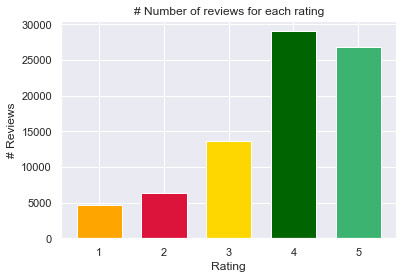

<Figure size 864x576 with 0 Axes>

In [48]:
ratings_ind = ont_reviews.stars.value_counts().index
ratings_val = ont_reviews.stars.value_counts().values
color_list = ['darkgreen', 'mediumseagreen', 'gold', 'crimson', 'orange']
mpt.bar(ratings_ind, ratings_val,color=color_list,width=.7)
mpt.title('# Number of reviews for each rating')
mpt.xlabel('Rating')
mpt.ylabel('# Reviews')
mpt.figure(figsize=(12,8))